## Instruction

**This notebook analyzes and demonstrates data from 40 replicate runs.**

In [1]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import numpy as np
import pandas as pd
import scipy
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

print("Pandas version:", pd.__version__)
print('Numpy version:',  np.__version__)
print('Scipy version:', scipy.__version__)
print('Matplotlib version:',  matplotlib.__version__)

Pandas version: 0.25.3
Numpy version: 1.18.2
Scipy version: 1.4.1
Matplotlib version: 3.1.3


## base

In [2]:
sub_base = pd.read_csv('Sub_base.csv',index_col=0)
sub_base.head()

,20201,20202,20203,20204,20205,20206,20207,20208,20209,202010,...,202031,202032,202033,202034,202035,202036,202037,202038,202039,202040
0,3445584.0,3445584.0,3445584.0,3445584.0,3445584.0,3445584.0,3445584.0,3445584.0,3445584.0,3445584.0,...,3445584.0,3445584.0,3445584.0,3445584.0,3445584.0,3445584.0,3445584.0,3445584.0,3445584.0,3445584.0
1,3445594.8,3445595.0,3445595.0,3445598.0,3445593.0,3445598.0,3445591.0,3445598.8,3445601.8,3445592.0,...,3445599.0,3445592.0,3445597.0,3445591.0,3445593.0,3445596.0,3445596.0,3445596.0,3445593.0,3445593.0
2,3445526.2,3445544.8,3445535.8,3445533.5,3445546.0,3445561.0,3445542.2,3445549.0,3445548.8,3445524.0,...,3445552.2,3445543.5,3445553.5,3445550.2,3445531.8,3445543.5,3445549.0,3445552.8,3445546.2,3445529.2
3,3445394.8,3445429.0,3445424.2,3445411.2,3445452.2,3445490.5,3445444.2,3445454.2,3445430.8,3445397.8,...,3445458.8,3445443.5,3445457.8,3445468.0,3445415.8,3445445.2,3445458.0,3445468.5,3445455.5,3445400.8
4,3445170.5,3445233.0,3445225.8,3445206.2,3445298.0,3445355.2,3445284.5,3445280.8,3445237.0,3445182.5,...,3445302.5,3445269.5,3445288.8,3445324.5,3445214.5,3445272.8,3445305.5,3445325.0,3445295.5,3445182.5


In [3]:
sub_base = sub_base/10000
sub_base.head()

,20201,20202,20203,20204,20205,20206,20207,20208,20209,202010,...,202031,202032,202033,202034,202035,202036,202037,202038,202039,202040
0,344.55840,344.55840,344.55840,344.55840,344.55840,344.55840,344.55840,344.55840,344.55840,344.55840,...,344.55840,344.55840,344.55840,344.55840,344.55840,344.55840,344.55840,344.55840,344.55840,344.55840
1,344.55948,344.55950,344.55950,344.55980,344.55930,344.55980,344.55910,344.55988,344.56018,344.55920,...,344.55990,344.55920,344.55970,344.55910,344.55930,344.55960,344.55960,344.55960,344.55930,344.55930
2,344.55262,344.55448,344.55358,344.55335,344.55460,344.55610,344.55422,344.55490,344.55488,344.55240,...,344.55522,344.55435,344.55535,344.55502,344.55318,344.55435,344.55490,344.55528,344.55462,344.55292
3,344.53948,344.54290,344.54242,344.54112,344.54522,344.54905,344.54442,344.54542,344.54308,344.53978,...,344.54588,344.54435,344.54578,344.54680,344.54158,344.54452,344.54580,344.54685,344.54555,344.54008
4,344.51705,344.52330,344.52258,344.52062,344.52980,344.53552,344.52845,344.52808,344.52370,344.51825,...,344.53025,344.52695,344.52888,344.53245,344.52145,344.52728,344.53055,344.53250,344.52955,344.51825


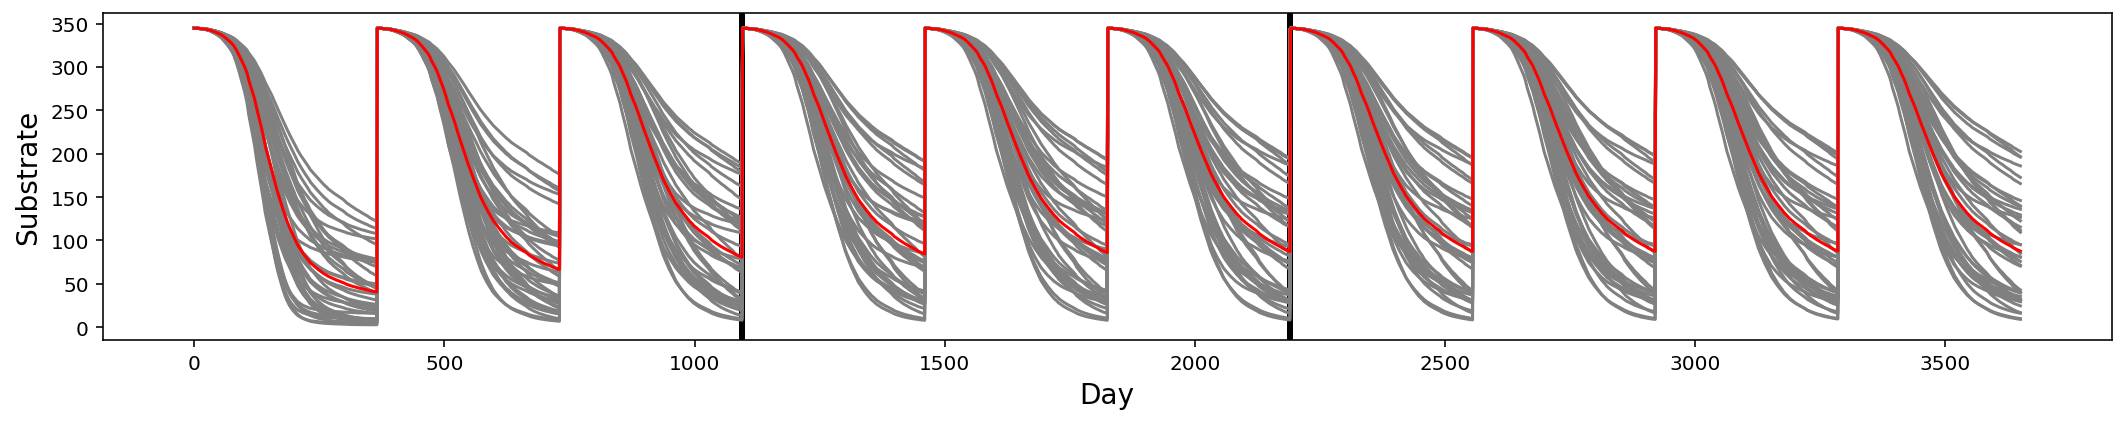

In [4]:
fig,ax = plt.subplots(1,1,figsize=(18,3))
ax.set_xlabel('Day',size=14)
ax.set_ylabel('Substrate',size=14)
ax.axvline(x=365*3, color='k',linestyle='-',lw=3)
ax.axvline(x=365*6, color='k',linestyle='-',lw=3)

for replicate in range(sub_base.shape[1]):
    ax.plot(sub_base.iloc[:,replicate],color='grey')
ax.plot(sub_base.mean(axis=1),color='red')

plt.show()

## base_dis

In [5]:
sub_base_dis = pd.read_csv('Sub_base_dis.csv',index_col=0)
sub_base_dis = sub_base_dis/10000
sub_base_dis.head()

,20201,20202,20203,20204,20205,20206,20207,20208,20209,202010,...,202031,202032,202033,202034,202035,202036,202037,202038,202039,202040
0,344.55840,344.55840,344.55840,344.55840,344.55840,344.55840,344.55840,344.55840,344.55840,344.55840,...,344.55840,344.55840,344.55840,344.55840,344.55840,344.55840,344.55840,344.55840,344.55840,344.55840
1,344.55948,344.55950,344.55950,344.55980,344.55930,344.55980,344.55910,344.55988,344.56018,344.55920,...,344.55990,344.55920,344.55970,344.55910,344.55930,344.55960,344.55960,344.55960,344.55930,344.55930
2,344.55262,344.55448,344.55358,344.55335,344.55460,344.55610,344.55422,344.55490,344.55488,344.55240,...,344.55522,344.55435,344.55535,344.55502,344.55318,344.55435,344.55490,344.55528,344.55462,344.55292
3,344.53948,344.54290,344.54242,344.54112,344.54522,344.54905,344.54442,344.54542,344.54308,344.53978,...,344.54588,344.54435,344.54578,344.54680,344.54158,344.54452,344.54580,344.54685,344.54555,344.54008
4,344.51705,344.52330,344.52258,344.52062,344.52980,344.53552,344.52845,344.52808,344.52370,344.51825,...,344.53025,344.52695,344.52888,344.53245,344.52145,344.52728,344.53055,344.53250,344.52955,344.51825


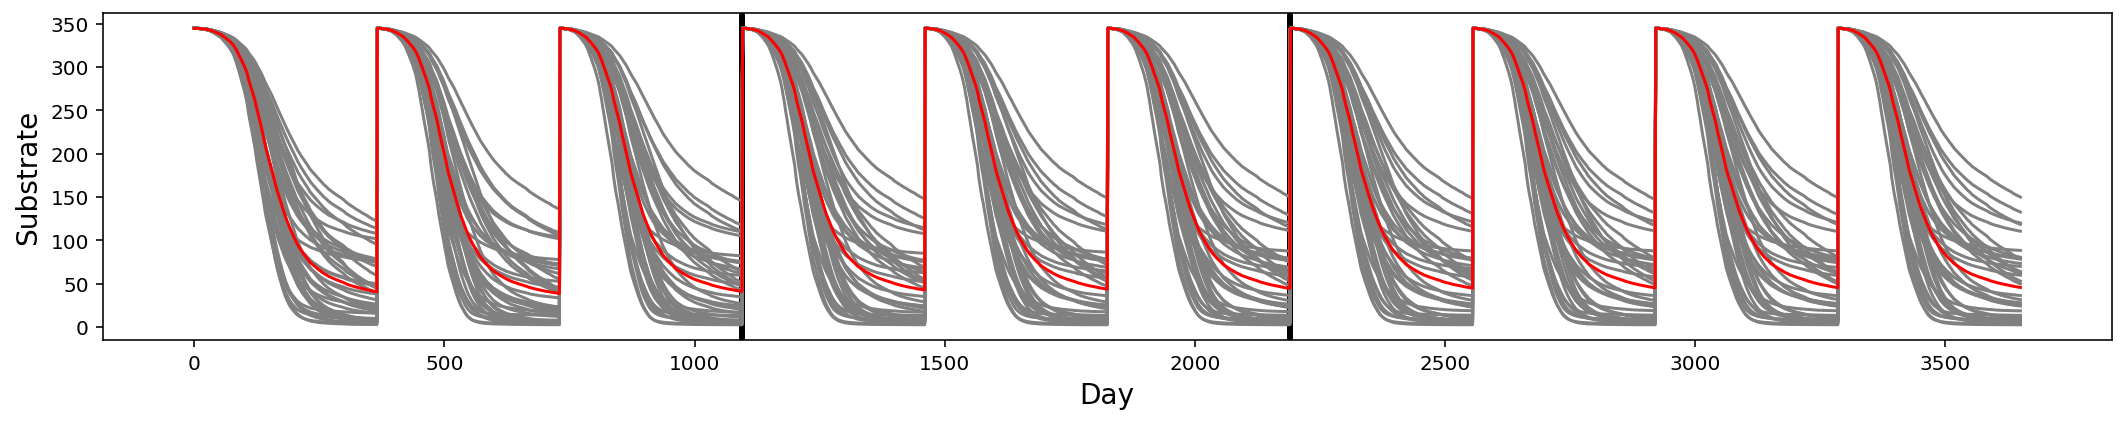

In [6]:
fig,ax = plt.subplots(1,1,figsize=(18,3))
ax.set_xlabel('Day',size=14)
ax.set_ylabel('Substrate',size=14)
ax.axvline(x=365*3, color='k',linestyle='-',lw=3)
ax.axvline(x=365*6, color='k',linestyle='-',lw=3)

for replicate in range(sub_base_dis.shape[1]):
    ax.plot(sub_base_dis.iloc[:,replicate],color='grey')
ax.plot(sub_base_dis.mean(axis=1),color='red')

plt.show()

## basex4

In [7]:
sub_basex4 = pd.read_csv('Sub_basex4.csv',index_col=0)
sub_basex4.head()

,20201,20202,20203,20204,20205,20206,20207,20208,20209,202010,...,202031,202032,202033,202034,202035,202036,202037,202038,202039,202040
0,3445584.0,3445584.0,3445584.0,3445584.0,3445584.0,3445584.0,3445584.0,3445584.0,3445584.0,3445584.0,...,3445584.0,3445584.0,3445584.0,3445584.0,3445584.0,3445584.0,3445584.0,3445584.0,3445584.0,3445584.0
1,3445594.8,3445595.0,3445595.0,3445598.0,3445593.0,3445598.0,3445591.0,3445598.8,3445601.8,3445592.0,...,3445599.0,3445592.0,3445597.0,3445591.0,3445593.0,3445596.0,3445596.0,3445596.0,3445593.0,3445593.0
2,3445526.2,3445544.8,3445535.8,3445533.5,3445546.0,3445561.0,3445542.2,3445549.0,3445548.8,3445524.0,...,3445552.2,3445543.5,3445553.5,3445550.2,3445531.8,3445543.5,3445549.0,3445552.8,3445546.2,3445529.2
3,3445394.8,3445429.0,3445424.2,3445411.2,3445452.2,3445490.5,3445444.2,3445454.2,3445430.8,3445397.8,...,3445458.8,3445443.5,3445457.8,3445468.0,3445415.8,3445445.2,3445458.0,3445468.5,3445455.5,3445400.8
4,3445170.5,3445233.0,3445225.8,3445206.2,3445298.0,3445355.2,3445284.5,3445280.8,3445237.0,3445182.5,...,3445302.5,3445269.5,3445288.8,3445324.5,3445214.5,3445272.8,3445305.5,3445325.0,3445295.5,3445182.5


In [8]:
sub_basex4 = sub_basex4/10000
sub_basex4.head()

,20201,20202,20203,20204,20205,20206,20207,20208,20209,202010,...,202031,202032,202033,202034,202035,202036,202037,202038,202039,202040
0,344.55840,344.55840,344.55840,344.55840,344.55840,344.55840,344.55840,344.55840,344.55840,344.55840,...,344.55840,344.55840,344.55840,344.55840,344.55840,344.55840,344.55840,344.55840,344.55840,344.55840
1,344.55948,344.55950,344.55950,344.55980,344.55930,344.55980,344.55910,344.55988,344.56018,344.55920,...,344.55990,344.55920,344.55970,344.55910,344.55930,344.55960,344.55960,344.55960,344.55930,344.55930
2,344.55262,344.55448,344.55358,344.55335,344.55460,344.55610,344.55422,344.55490,344.55488,344.55240,...,344.55522,344.55435,344.55535,344.55502,344.55318,344.55435,344.55490,344.55528,344.55462,344.55292
3,344.53948,344.54290,344.54242,344.54112,344.54522,344.54905,344.54442,344.54542,344.54308,344.53978,...,344.54588,344.54435,344.54578,344.54680,344.54158,344.54452,344.54580,344.54685,344.54555,344.54008
4,344.51705,344.52330,344.52258,344.52062,344.52980,344.53552,344.52845,344.52808,344.52370,344.51825,...,344.53025,344.52695,344.52888,344.53245,344.52145,344.52728,344.53055,344.53250,344.52955,344.51825


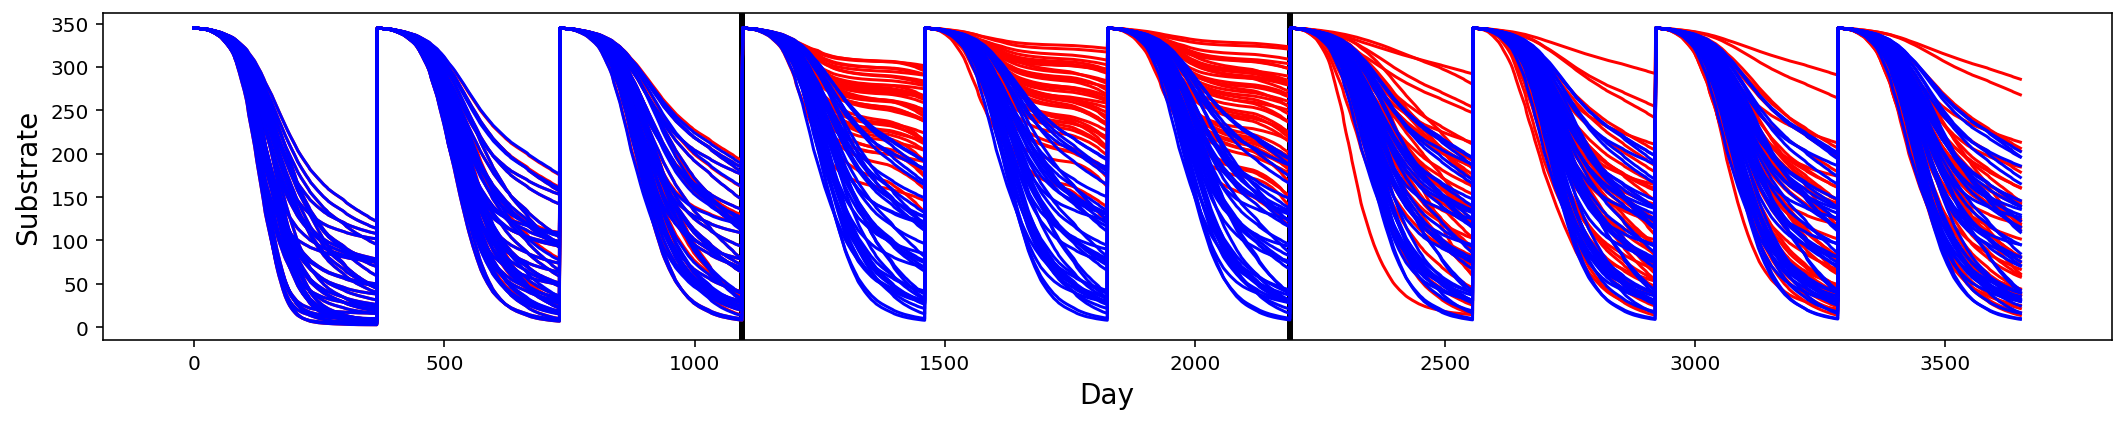

In [9]:
fig,ax = plt.subplots(1,1,figsize=(18,3))
ax.set_xlabel('Day',size=14)
ax.set_ylabel('Substrate',size=14)
ax.axvline(x=365*3, color='k',linestyle='-',lw=3)
ax.axvline(x=365*6, color='k',linestyle='-',lw=3)

for replicate in range(sub_basex4.shape[1]):
    ax.plot(sub_basex4.iloc[:,replicate],color='red')
#ax.plot(sub_basex2.mean(axis=1),color='red')

#base scenario
for replicate in range(sub_base.shape[1]):
    ax.plot(sub_base.iloc[:,replicate],color='blue')
#ax.plot(sub_base.mean(axis=1),color='red')

plt.show()

## `basex10`

In [10]:
sub_basex10 = pd.read_csv('Sub_basex10.csv',index_col=0)
sub_basex10.head()

,20201,20202,20203,20204,20205,20206,20207,20208,20209,202010,...,202031,202032,202033,202034,202035,202036,202037,202038,202039,202040
0,3445584.0,3445584.0,3445584.0,3445584.0,3445584.0,3445584.0,3445584.0,3445584.0,3445584.0,3445584.0,...,3445584.0,3445584.0,3445584.0,3445584.0,3445584.0,3445584.0,3445584.0,3445584.0,3445584.0,3445584.0
1,3445594.8,3445595.0,3445595.0,3445598.0,3445593.0,3445598.0,3445591.0,3445598.8,3445601.8,3445592.0,...,3445599.0,3445592.0,3445597.0,3445591.0,3445593.0,3445596.0,3445596.0,3445596.0,3445593.0,3445593.0
2,3445526.2,3445544.8,3445535.8,3445533.5,3445546.0,3445561.0,3445542.2,3445549.0,3445548.8,3445524.0,...,3445552.2,3445543.5,3445553.5,3445550.2,3445531.8,3445543.5,3445549.0,3445552.8,3445546.2,3445529.2
3,3445394.8,3445429.0,3445424.2,3445411.2,3445452.2,3445490.5,3445444.2,3445454.2,3445430.8,3445397.8,...,3445458.8,3445443.5,3445457.8,3445468.0,3445415.8,3445445.2,3445458.0,3445468.5,3445455.5,3445400.8
4,3445170.5,3445233.0,3445225.8,3445206.2,3445298.0,3445355.2,3445284.5,3445280.8,3445237.0,3445182.5,...,3445302.5,3445269.5,3445288.8,3445324.5,3445214.5,3445272.8,3445305.5,3445325.0,3445295.5,3445182.5


In [11]:
sub_basex10 = sub_basex10/10000
sub_basex10.head()

,20201,20202,20203,20204,20205,20206,20207,20208,20209,202010,...,202031,202032,202033,202034,202035,202036,202037,202038,202039,202040
0,344.55840,344.55840,344.55840,344.55840,344.55840,344.55840,344.55840,344.55840,344.55840,344.55840,...,344.55840,344.55840,344.55840,344.55840,344.55840,344.55840,344.55840,344.55840,344.55840,344.55840
1,344.55948,344.55950,344.55950,344.55980,344.55930,344.55980,344.55910,344.55988,344.56018,344.55920,...,344.55990,344.55920,344.55970,344.55910,344.55930,344.55960,344.55960,344.55960,344.55930,344.55930
2,344.55262,344.55448,344.55358,344.55335,344.55460,344.55610,344.55422,344.55490,344.55488,344.55240,...,344.55522,344.55435,344.55535,344.55502,344.55318,344.55435,344.55490,344.55528,344.55462,344.55292
3,344.53948,344.54290,344.54242,344.54112,344.54522,344.54905,344.54442,344.54542,344.54308,344.53978,...,344.54588,344.54435,344.54578,344.54680,344.54158,344.54452,344.54580,344.54685,344.54555,344.54008
4,344.51705,344.52330,344.52258,344.52062,344.52980,344.53552,344.52845,344.52808,344.52370,344.51825,...,344.53025,344.52695,344.52888,344.53245,344.52145,344.52728,344.53055,344.53250,344.52955,344.51825


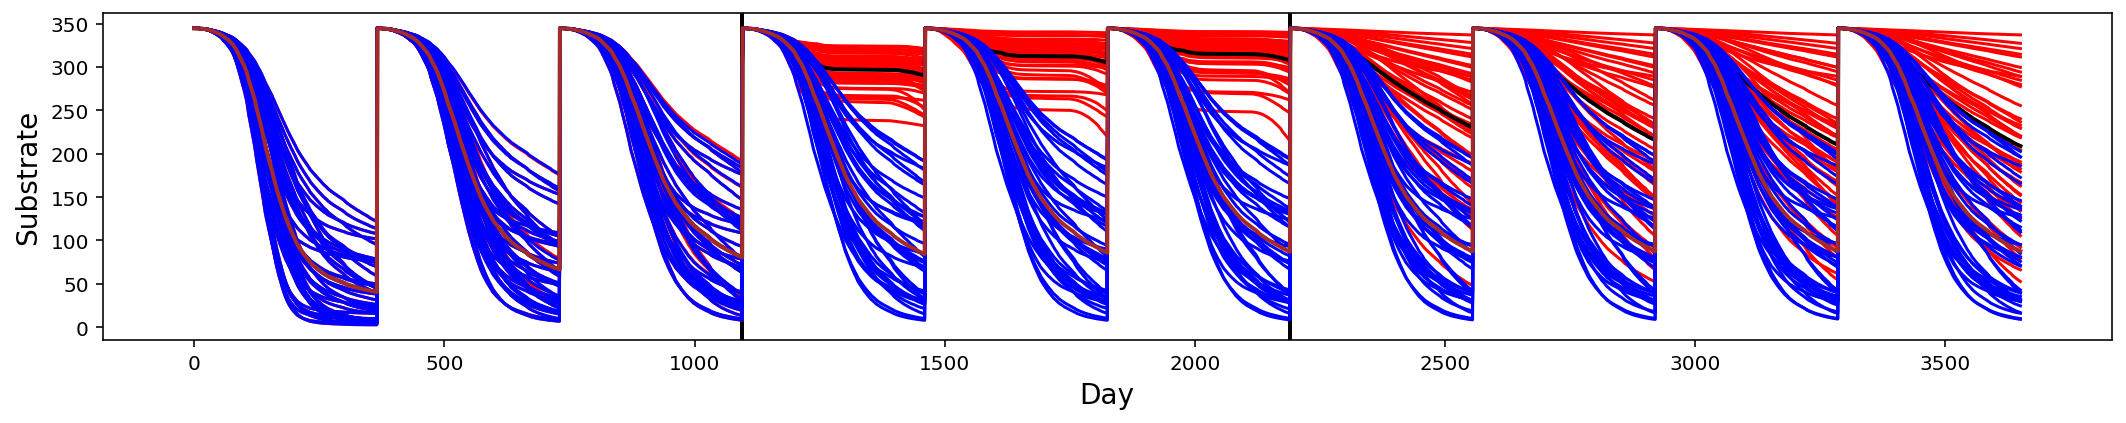

In [12]:
fig,ax = plt.subplots(1,1,figsize=(18,3))
ax.set_xlabel('Day',size=14)
ax.set_ylabel('Substrate',size=14)
ax.axvline(x=365*3, color='k',linestyle='-',lw=2)
ax.axvline(x=365*6, color='k',linestyle='-',lw=2)

for replicate in range(sub_basex10.shape[1]):
    ax.plot(sub_basex10.iloc[:,replicate],color='red')
ax.plot(sub_basex10.mean(axis=1),color='black',lw=2)

#base
for replicate in range(sub_base.shape[1]):
    ax.plot(sub_base.iloc[:,replicate],color='blue')
ax.plot(sub_base.mean(axis=1),color='brown',lw=2)

plt.show()

## basex10_dis

In [13]:
sub_basex10_dis = pd.read_csv('Sub_basex10_dis.csv',index_col=0)
sub_basex10_dis.head()

,20201,20202,20203,20204,20205,20206,20207,20208,20209,202010,...,202031,202032,202033,202034,202035,202036,202037,202038,202039,202040
0,3445584.0,3445584.0,3445584.0,3445584.0,3445584.0,3445584.0,3445584.0,3445584.0,3445584.0,3445584.0,...,3445584.0,3445584.0,3445584.0,3445584.0,3445584.0,3445584.0,3445584.0,3445584.0,3445584.0,3445584.0
1,3445594.8,3445595.0,3445595.0,3445598.0,3445593.0,3445598.0,3445591.0,3445598.8,3445601.8,3445592.0,...,3445599.0,3445592.0,3445597.0,3445591.0,3445593.0,3445596.0,3445596.0,3445596.0,3445593.0,3445593.0
2,3445526.2,3445544.8,3445535.8,3445533.5,3445546.0,3445561.0,3445542.2,3445549.0,3445548.8,3445524.0,...,3445552.2,3445543.5,3445553.5,3445550.2,3445531.8,3445543.5,3445549.0,3445552.8,3445546.2,3445529.2
3,3445394.8,3445429.0,3445424.2,3445411.2,3445452.2,3445490.5,3445444.2,3445454.2,3445430.8,3445397.8,...,3445458.8,3445443.5,3445457.8,3445468.0,3445415.8,3445445.2,3445458.0,3445468.5,3445455.5,3445400.8
4,3445170.5,3445233.0,3445225.8,3445206.2,3445298.0,3445355.2,3445284.5,3445280.8,3445237.0,3445182.5,...,3445302.5,3445269.5,3445288.8,3445324.5,3445214.5,3445272.8,3445305.5,3445325.0,3445295.5,3445182.5


In [14]:
sub_basex10_dis = sub_basex10_dis/10000
sub_basex10_dis.head()

,20201,20202,20203,20204,20205,20206,20207,20208,20209,202010,...,202031,202032,202033,202034,202035,202036,202037,202038,202039,202040
0,344.55840,344.55840,344.55840,344.55840,344.55840,344.55840,344.55840,344.55840,344.55840,344.55840,...,344.55840,344.55840,344.55840,344.55840,344.55840,344.55840,344.55840,344.55840,344.55840,344.55840
1,344.55948,344.55950,344.55950,344.55980,344.55930,344.55980,344.55910,344.55988,344.56018,344.55920,...,344.55990,344.55920,344.55970,344.55910,344.55930,344.55960,344.55960,344.55960,344.55930,344.55930
2,344.55262,344.55448,344.55358,344.55335,344.55460,344.55610,344.55422,344.55490,344.55488,344.55240,...,344.55522,344.55435,344.55535,344.55502,344.55318,344.55435,344.55490,344.55528,344.55462,344.55292
3,344.53948,344.54290,344.54242,344.54112,344.54522,344.54905,344.54442,344.54542,344.54308,344.53978,...,344.54588,344.54435,344.54578,344.54680,344.54158,344.54452,344.54580,344.54685,344.54555,344.54008
4,344.51705,344.52330,344.52258,344.52062,344.52980,344.53552,344.52845,344.52808,344.52370,344.51825,...,344.53025,344.52695,344.52888,344.53245,344.52145,344.52728,344.53055,344.53250,344.52955,344.51825


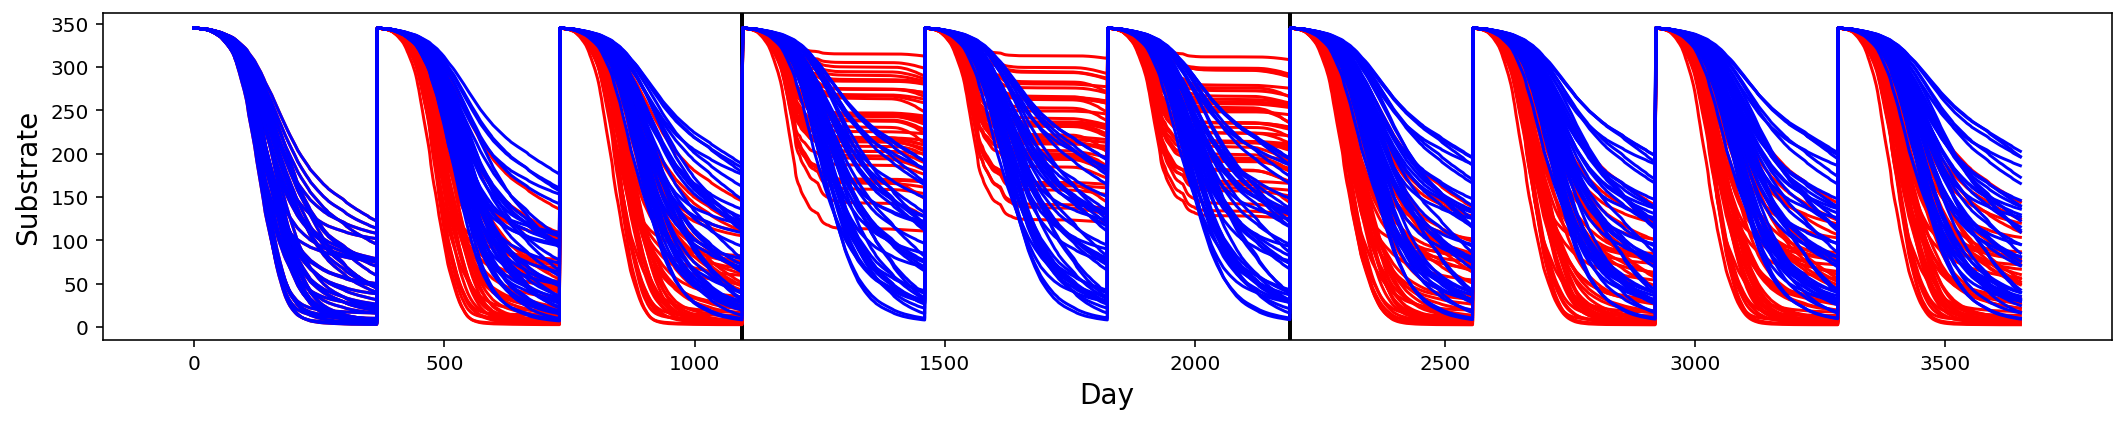

In [15]:
fig,ax = plt.subplots(1,1,figsize=(18,3))
ax.set_xlabel('Day',size=14)
ax.set_ylabel('Substrate',size=14)
ax.axvline(x=365*3, color='k',linestyle='-',lw=2)
ax.axvline(x=365*6, color='k',linestyle='-',lw=2)

for replicate in range(sub_basex10_dis.shape[1]):
    ax.plot(sub_basex10_dis.iloc[:,replicate],color='red')
#ax.plot(sub_basex10_dis.mean(axis=1),color='black',lw=2)

#base
for replicate in range(sub_base.shape[1]):
    ax.plot(sub_base.iloc[:,replicate],color='blue')
#ax.plot(sub_base.mean(axis=1),color='brown',lw=2)

plt.show()

## Combination

NameError: name 'sub_basex2' is not defined

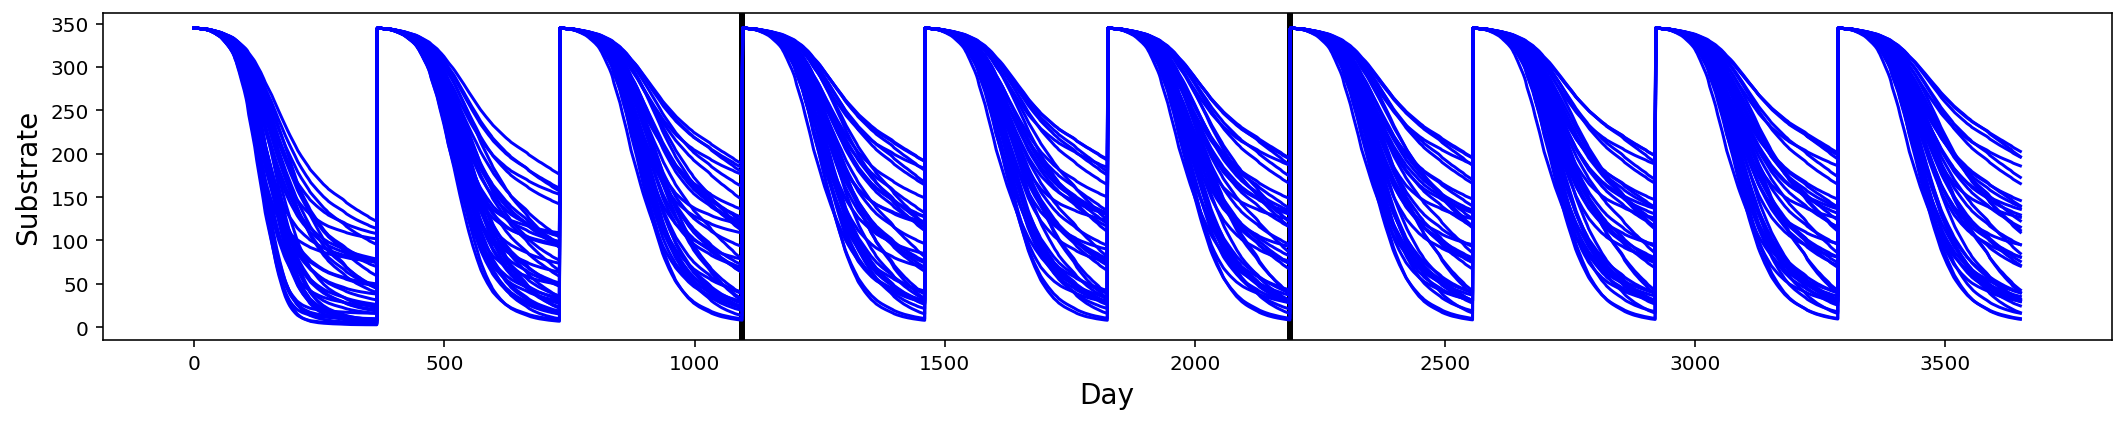

In [16]:
fig,ax = plt.subplots(1,1,figsize=(18,3))
ax.set_xlabel('Day',size=14)
ax.set_ylabel('Substrate',size=14)
ax.axvline(x=365*3, color='k',linestyle='-',lw=3)
ax.axvline(x=365*6, color='k',linestyle='-',lw=3)

#base
for replicate1 in range(sub_base.shape[1]):
    ax.plot(sub_base.iloc[:,replicate1],color='blue')
    
#
for replicate2 in range(sub_basex2.shape[1]):
    ax.plot(sub_basex2.iloc[:,replicate2],color='orange',alpha=0.8)

#
for replicate3 in range(sub_basex15.shape[1]):
    ax.plot(sub_basex15.iloc[:,replicate3],color='red',alpha=0.5)

#
#for replicate4 in range(sub_basex20.shape[1]):
#    ax.plot(sub_basex20.iloc[:,replicate4],color='red',alpha=0.5)


plt.show()

## Re-assembled Dataset of Year 3, 6, & 9

### Visualization 1

In [16]:
index_3 = [i for i in range(365*2+1,365*3+1)]
index_6 = [i for i in range(365*5+1,365*6+1)]
index_7 = [i for i in range(365*6+1,365*7+1)]
index_8 = [i for i in range(365*7+1,365*8+1)]
index_9 = [i for i in range(365*8+1,365*9+1)]

index_369   = index_3 + index_6 + index_9
index_36789 = index_3 + index_6 + index_7 + index_8 + index_9

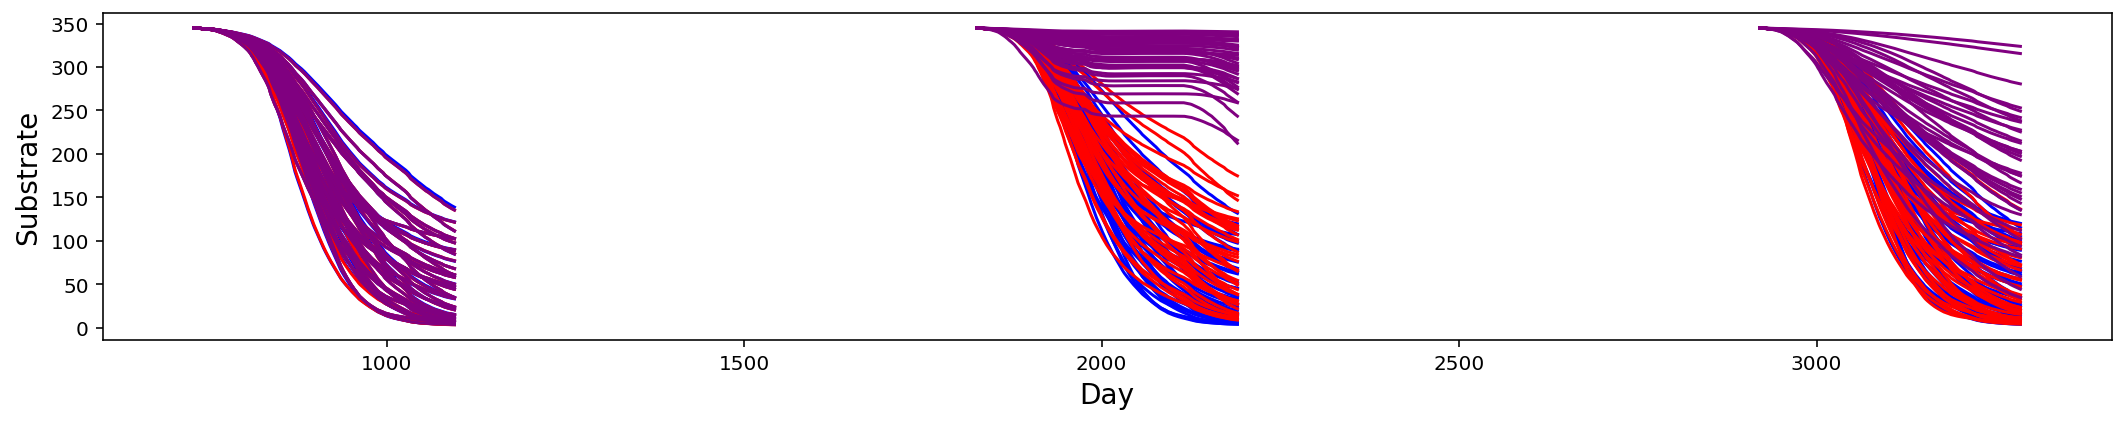

In [31]:
fig,ax = plt.subplots(1,1,figsize=(18,3))
ax.set_xlabel('Day',size=14)
ax.set_ylabel('Substrate',size=14)
#ax.axvline(x=365*3, color='k',linestyle='-',lw=2)
#ax.axvline(x=365*6, color='k',linestyle='-',lw=2)


for replicate1 in range(sub_base.shape[1]):
    ax.plot(sub_base.iloc[index_3,replicate1],color='blue')
    ax.plot(sub_base.iloc[index_6,replicate1],color='blue')
    ax.plot(sub_base.iloc[index_9,replicate1],color='blue')
    
for replicate2 in range(sub_basex2.shape[1]):
    ax.plot(sub_basex2.iloc[index_3,replicate2],color='red')
    ax.plot(sub_basex2.iloc[index_6,replicate2],color='red')
    ax.plot(sub_basex2.iloc[index_9,replicate2],color='red')
    
    
for replicate15 in range(sub_basex15.shape[1]):
    ax.plot(sub_basex15.iloc[index_3,replicate15],color='purple')
    ax.plot(sub_basex15.iloc[index_6,replicate15],color='purple')
    ax.plot(sub_basex15.iloc[index_9,replicate15],color='purple')

### Visualization 2

**Make the 3 Years stick together**

In [17]:
sub_base369    = sub_base.iloc[index_369,:].reset_index(drop=True)
sub_basex4369  = sub_basex4.iloc[index_369,:].reset_index(drop=True)
sub_basex10369 = sub_basex10.iloc[index_369,:].reset_index(drop=True)

sub_base_dis369    = sub_base_dis.iloc[index_369,:].reset_index(drop=True)
sub_basex10_dis369 = sub_basex10_dis.iloc[index_369,:].reset_index(drop=True)

In [18]:
sub_base36789    = sub_base.iloc[index_36789,:].reset_index(drop=True)
sub_basex436789  = sub_basex4.iloc[index_36789,:].reset_index(drop=True)
sub_basex1036789 = sub_basex10.iloc[index_36789,:].reset_index(drop=True)

sub_base_dis36789    = sub_base_dis.iloc[index_36789,:].reset_index(drop=True)
sub_basex10_dis36789 = sub_basex10_dis.iloc[index_36789,:].reset_index(drop=True)

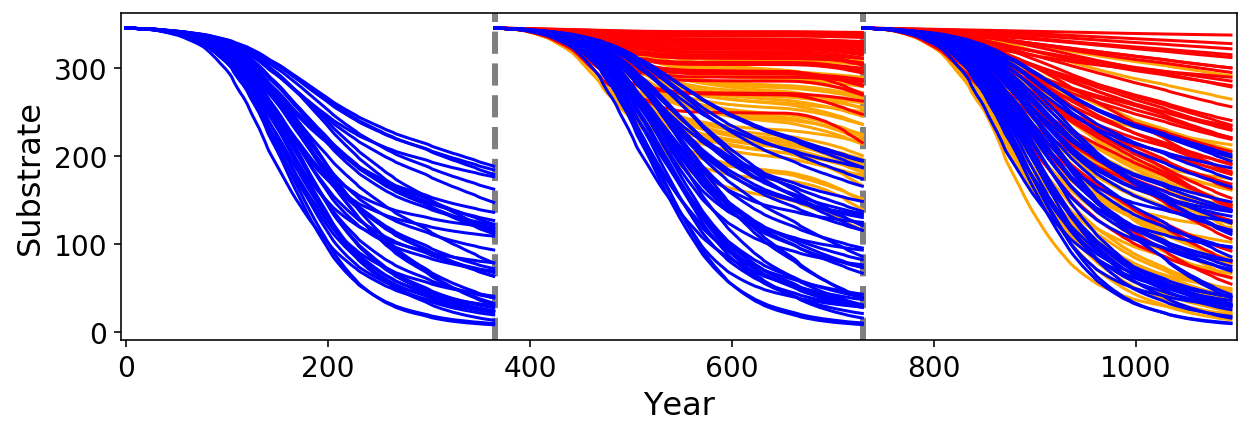

In [18]:
fig,ax = plt.subplots(1,1,figsize=(10,3))
ax.set_xlabel('Year',size=16)
ax.set_ylabel('Substrate',size=16)
ax.axvline(x=365*1, color='grey',linestyle='--',lw=3)
ax.axvline(x=365*2, color='grey',linestyle='--',lw=3)
ax.set_xlim(-5,365*3+5)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)


for replicate in range(sub_basex4369.shape[1]):
    #ax.plot(sub_basex2369.iloc[0:365*1,replicate],   color='yellow')
    ax.plot(sub_basex4369.iloc[365*1:365*2,replicate],color='orange')
    ax.plot(sub_basex4369.iloc[365*2:365*3,replicate],color='orange')
    
for replicate in range(sub_basex10369.shape[1]):
    #ax.plot(sub_basex15369.iloc[0:365*1,replicate],   color='red')
    ax.plot(sub_basex10369.iloc[365*1:365*2,replicate],color='red')
    ax.plot(sub_basex10369.iloc[365*2:365*3,replicate],color='red')

for replicate in range(sub_base369.shape[1]):
    ax.plot(sub_base369.iloc[0:365*1,    replicate],color='blue')
    ax.plot(sub_base369.iloc[365*1:365*2,replicate],color='blue')
    ax.plot(sub_base369.iloc[365*2:365*3,replicate],color='blue')

plt.show()

## re-sample data

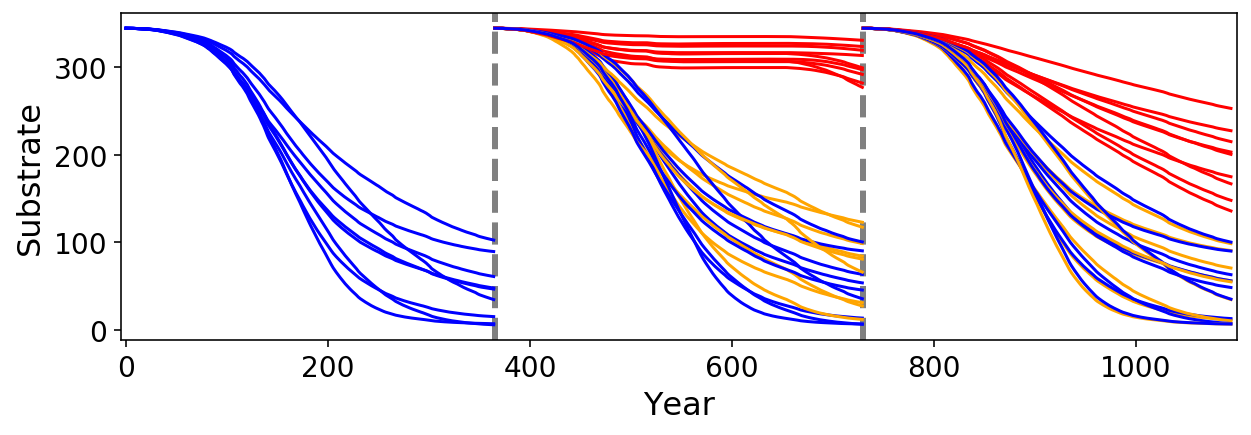

In [34]:
fig,ax = plt.subplots(1,1,figsize=(10,3))
ax.set_xlabel('Year',size=16)
ax.set_ylabel('Substrate',size=16)
ax.axvline(x=365*1, color='grey',linestyle='--',lw=3)
ax.axvline(x=365*2, color='grey',linestyle='--',lw=3)
ax.set_xlim(-5,365*3+5)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)


for replicate in [0,3,4,6,8,9,10,11,12]:
    #ax.plot(sub_basex2369.iloc[0:365*1,replicate],   color='yellow')
    ax.plot(sub_basex2369.iloc[365*1:365*2,replicate],color='orange')
    ax.plot(sub_basex2369.iloc[365*2:365*3,replicate],color='orange')
    

    #ax.plot(sub_basex15369.iloc[0:365*1,replicate],   color='red')
    ax.plot(sub_basex15369.iloc[365*1:365*2,replicate],color='red')
    ax.plot(sub_basex15369.iloc[365*2:365*3,replicate],color='red')


    ax.plot(sub_base369.iloc[0:365*1,    replicate],color='blue')
    ax.plot(sub_base369.iloc[365*1:365*2,replicate],color='blue')
    ax.plot(sub_base369.iloc[365*2:365*3,replicate],color='blue')

plt.show()

#### Define Function of Confidence Interval

In [19]:
def confi_interval(df):
    alpha = 0.05
    
    lower = df.apply(
        lambda df: df.mean() - (stats.t.ppf(1 - alpha/2, df.count()-1) * df.std(ddof=1)/np.sqrt(df.count())),axis=1
    )
    upper = df.apply(lambda df: df.mean() + (stats.t.ppf(1 - alpha/2, df.count()-1) * df.std(ddof=1)/np.sqrt(df.count())),axis=1)
    
    return lower,upper

In [20]:
#replicate = [0,3,4,6,8,9,10,11,12]

bound369    = confi_interval(sub_base369.iloc[:,:])
boundx4369  = confi_interval(sub_basex4369.iloc[:,:])
boundx10369 = confi_interval(sub_basex10369.iloc[:,:])

bounddis369 = confi_interval(sub_base_dis369.iloc[:,:]) # cumulative initialization
boundx10dis369 = confi_interval(sub_basex10_dis369.iloc[:,:]) # cumulative initialization

In [21]:
bound36789    = confi_interval(sub_base36789.iloc[:,:])
boundx436789  = confi_interval(sub_basex436789.iloc[:,:])
boundx1036789 = confi_interval(sub_basex1036789.iloc[:,:])

bounddis36789 = confi_interval(sub_base_dis36789.iloc[:,:]) # cumulative initialization
boundx10dis36789 = confi_interval(sub_basex10_dis36789.iloc[:,:]) # cumulative initialization

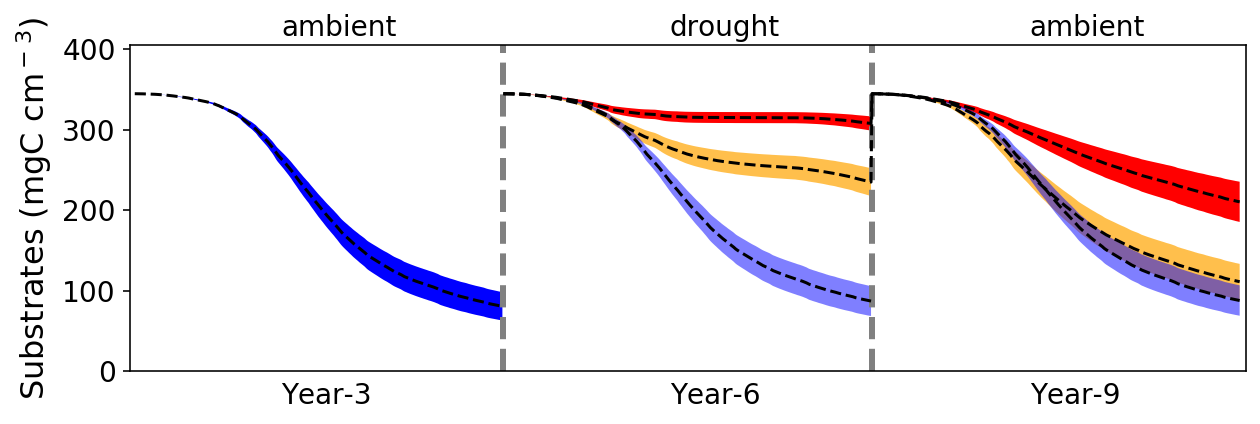

In [22]:
fig,ax = plt.subplots(1,1,figsize=(10,3))
ax.axvline(x=365*1, color='grey',linestyle='--',lw=3)
ax.axvline(x=365*2, color='grey',linestyle='--',lw=3)
ax.set_xlim(-5,365*3+5)
ax.set_ylim(0,400+5)

ax.tick_params(bottom=False,labelbottom=False)    
#ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)

#ax.set_xlabel('Year',size=16)
ax.set_ylabel("Substrates (mgC cm$^-$$^3$)",size=16,weight='normal', color='k')
plt.figtext(0.23,0.05,'Year-3',fontsize=14)
plt.figtext(0.50,0.05,'Year-6',fontsize=14)
plt.figtext(0.75,0.05,'Year-9',fontsize=14)

plt.figtext(0.23,0.9,'ambient',fontsize=14)
plt.figtext(0.50,0.9,'drought',fontsize=14)
plt.figtext(0.75,0.9,'ambient',fontsize=14)

ax.plot(sub_basex10369.mean(axis=1)[365*1:365*3],color='k',linestyle='--')
ax.fill_between(x=sub_basex10369.index[365*1:365*2],y1=boundx10369[0][365*1:365*2],y2=boundx10369[1][365*1:365*2], facecolor='red',alpha=1.0)
ax.fill_between(x=sub_basex10369.index[365*2:365*3],y1=boundx10369[0][365*2:365*3],y2=boundx10369[1][365*2:365*3], facecolor='red',alpha=1.0)

ax.plot(sub_basex4369.mean(axis=1)[365*1:365*3],color='k',linestyle='--')
ax.fill_between(x=sub_basex4369.index[365*1:365*2], y1=boundx4369[0][365*1:365*2], y2=boundx4369[1][365*1:365*2], facecolor='orange', alpha=0.7)
ax.fill_between(x=sub_basex4369.index[365*2:365*3], y1=boundx4369[0][365*2:365*3], y2=boundx4369[1][365*2:365*3], facecolor='orange', alpha=0.7)

#ax.fill_between(x=sub_basex2369.index, y1=boundx2369[0], y2=boundx2369[1],  facecolor='orange', alpha=1.0)
ax.plot(sub_base369.mean(axis=1)[365*0:365*1],color='k',linestyle='--')
ax.fill_between(x=sub_base369.index[365*0:365*1], y1=bound369[0][365*0:365*1], y2=bound369[1][365*0:365*1], facecolor='blue', alpha=1.0) 
ax.plot(sub_base369.mean(axis=1)[365*1:365*2],color='k',linestyle='--')
ax.fill_between(x=sub_base369.index[365*1:365*2], y1=bound369[0][365*1:365*2], y2=bound369[1][365*1:365*2], facecolor='blue', alpha=0.5) 
ax.plot(sub_base369.mean(axis=1)[365*2:365*3],color='k',linestyle='--')
ax.fill_between(x=sub_base369.index[365*2:365*3], y1=bound369[0][365*2:365*3], y2=bound369[1][365*2:365*3], facecolor='blue', alpha=0.5) 

#ax.legend()

#plt.savefig('legacy_sub.pdf',bbox_inches='tight')

plt.show()

## `data 3 + 6-9`

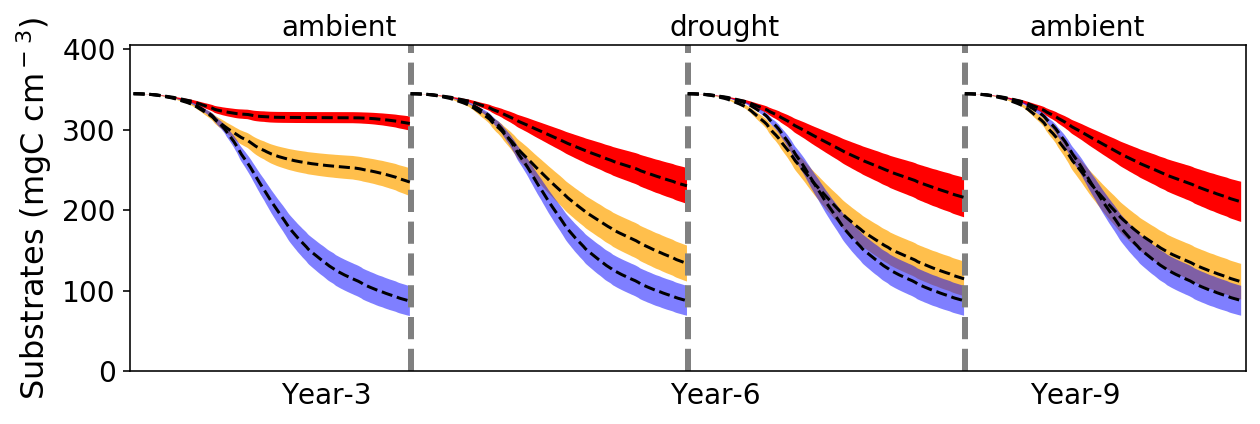

In [24]:
fig,ax = plt.subplots(1,1,figsize=(10,3))
ax.axvline(x=365*2, color='grey',linestyle='--',lw=3)
ax.axvline(x=365*3, color='grey',linestyle='--',lw=3)
ax.axvline(x=365*4, color='grey',linestyle='--',lw=3)
ax.set_xlim(365*1-5,365*5+5)
ax.set_ylim(0,400+5)

ax.tick_params(bottom=False,labelbottom=False)    
#ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)

#ax.set_xlabel('Year',size=16)
ax.set_ylabel("Substrates (mgC cm$^-$$^3$)",size=16,weight='normal', color='k')
plt.figtext(0.23,0.05,'Year-3',fontsize=14)
plt.figtext(0.50,0.05,'Year-6',fontsize=14)
plt.figtext(0.75,0.05,'Year-9',fontsize=14)

plt.figtext(0.23,0.9,'ambient',fontsize=14)
plt.figtext(0.50,0.9,'drought',fontsize=14)
plt.figtext(0.75,0.9,'ambient',fontsize=14)

## scenario basex10
#year6
ax.plot(sub_basex1036789.mean(axis=1)[365*1:365*2],color='k',linestyle='--')
ax.fill_between(x=sub_basex1036789.index[365*1:365*2],y1=boundx1036789[0][365*1:365*2],y2=boundx1036789[1][365*1:365*2], facecolor='red',alpha=1.0)
#year7
ax.plot(sub_basex1036789.mean(axis=1)[365*2:365*3],color='k',linestyle='--')
ax.fill_between(x=sub_basex1036789.index[365*2:365*3],y1=boundx1036789[0][365*2:365*3],y2=boundx1036789[1][365*2:365*3], facecolor='red',alpha=1.0)
#year8
ax.plot(sub_basex1036789.mean(axis=1)[365*3:365*4],color='k',linestyle='--')
ax.fill_between(x=sub_basex1036789.index[365*3:365*4],y1=boundx1036789[0][365*3:365*4],y2=boundx1036789[1][365*3:365*4], facecolor='red',alpha=1.0)
#year9
ax.plot(sub_basex1036789.mean(axis=1)[365*4:365*5],color='k',linestyle='--')
ax.fill_between(x=sub_basex1036789.index[365*4:365*5],y1=boundx1036789[0][365*4:365*5],y2=boundx1036789[1][365*4:365*5], facecolor='red',alpha=1.0)


## scenario basex4
#year-6
ax.plot(sub_basex436789.mean(axis=1)[365*1:365*2],color='k',linestyle='--')
ax.fill_between(x=sub_basex436789.index[365*1:365*2], y1=boundx436789[0][365*1:365*2], y2=boundx436789[1][365*1:365*2], facecolor='orange', alpha=0.7)
#year-7
ax.plot(sub_basex436789.mean(axis=1)[365*2:365*3],color='k',linestyle='--')
ax.fill_between(x=sub_basex436789.index[365*2:365*3], y1=boundx436789[0][365*2:365*3], y2=boundx436789[1][365*2:365*3], facecolor='orange', alpha=0.7)
#year-8
ax.plot(sub_basex436789.mean(axis=1)[365*3:365*4],color='k',linestyle='--')
ax.fill_between(x=sub_basex436789.index[365*3:365*4], y1=boundx436789[0][365*3:365*4], y2=boundx436789[1][365*3:365*4], facecolor='orange', alpha=0.7)
#year-9
ax.plot(sub_basex436789.mean(axis=1)[365*4:365*5],color='k',linestyle='--')
ax.fill_between(x=sub_basex436789.index[365*4:365*5], y1=boundx436789[0][365*4:365*5], y2=boundx436789[1][365*4:365*5], facecolor='orange', alpha=0.7)


#year-3
#ax.plot(sub_base36789.mean(axis=1)[365*0:365*1],color='k',linestyle='--')
#ax.fill_between(x=sub_base36789.index[365*0:365*1], y1=bound36789[0][365*0:365*1], y2=bound36789[1][365*0:365*1], facecolor='blue', alpha=1.0) 
#year-6
ax.plot(sub_base36789.mean(axis=1)[365*1:365*2],color='k',linestyle='--')
ax.fill_between(x=sub_base36789.index[365*1:365*2], y1=bound36789[0][365*1:365*2], y2=bound36789[1][365*1:365*2], facecolor='blue', alpha=0.5) 
#year-7
ax.plot(sub_base36789.mean(axis=1)[365*2:365*3],color='k',linestyle='--')
ax.fill_between(x=sub_base36789.index[365*2:365*3], y1=bound36789[0][365*2:365*3], y2=bound36789[1][365*2:365*3], facecolor='blue', alpha=0.5) 
#year-8
ax.plot(sub_base36789.mean(axis=1)[365*3:365*4],color='k',linestyle='--')
ax.fill_between(x=sub_base36789.index[365*3:365*4], y1=bound36789[0][365*2:365*3], y2=bound36789[1][365*2:365*3], facecolor='blue', alpha=0.5) 
#year-9
ax.plot(sub_base36789.mean(axis=1)[365*4:365*5],color='k',linestyle='--')
ax.fill_between(x=sub_base36789.index[365*4:365*5], y1=bound36789[0][365*2:365*3], y2=bound36789[1][365*2:365*3], facecolor='blue', alpha=0.5) 

#ax.annotate("", xy=(365*2, 400),arrowprops=dict(arrowstyle="<-",facecolor='black'))

#ax.legend()

#plt.savefig('legacy_sub.pdf',bbox_inches='tight')

plt.show()

## `data 6 + 9`

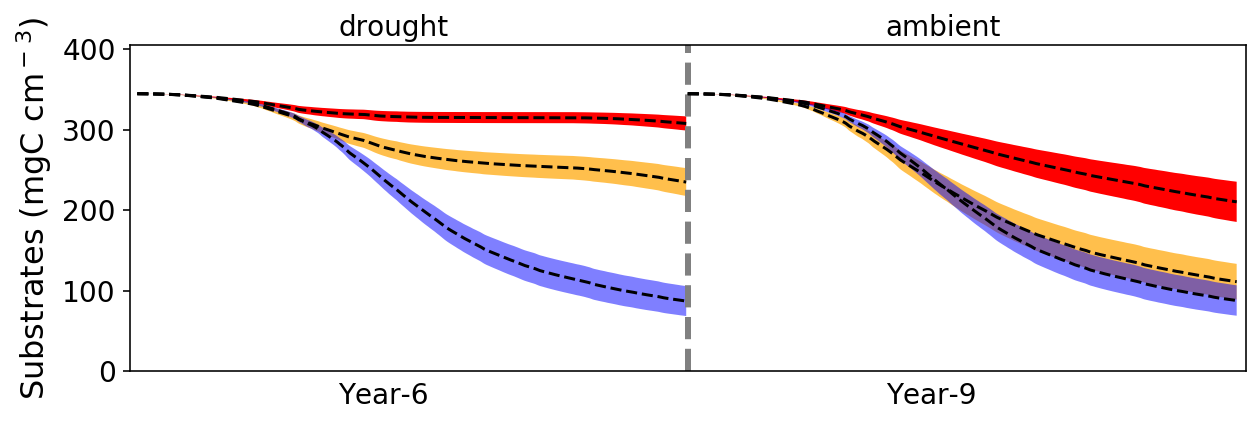

In [25]:
fig,ax = plt.subplots(1,1,figsize=(10,3))
#ax.axvline(x=365*1, color='grey',linestyle='--',lw=3)
ax.axvline(x=365*2, color='grey',linestyle='--',lw=3)
ax.set_xlim(365*1-5,365*3+5)
ax.set_ylim(0,400+5)

ax.tick_params(bottom=False,labelbottom=False)    
#ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)

#ax.set_xlabel('Year',size=16)
ax.set_ylabel("Substrates (mgC cm$^-$$^3$)",size=16,weight='normal', color='k')

plt.figtext(0.27,0.05,'Year-6',fontsize=14)
plt.figtext(0.65,0.05,'Year-9',fontsize=14)

plt.figtext(0.27,0.9,'drought',fontsize=14)
plt.figtext(0.65,0.9,'ambient',fontsize=14)

ax.plot(sub_basex10369.mean(axis=1)[365*1:365*2],color='k',linestyle='--')
ax.fill_between(x=sub_basex10369.index[365*1:365*2],y1=boundx10369[0][365*1:365*2],y2=boundx10369[1][365*1:365*2], facecolor='red',alpha=1.0)
ax.plot(sub_basex10369.mean(axis=1)[365*2:365*3],color='k',linestyle='--')
ax.fill_between(x=sub_basex10369.index[365*2:365*3],y1=boundx10369[0][365*2:365*3],y2=boundx10369[1][365*2:365*3], facecolor='red',alpha=1.0)

ax.plot(sub_basex4369.mean(axis=1)[365*1:365*2],color='k',linestyle='--')
ax.fill_between(x=sub_basex4369.index[365*1:365*2], y1=boundx4369[0][365*1:365*2], y2=boundx4369[1][365*1:365*2], facecolor='orange', alpha=0.7)
ax.plot(sub_basex4369.mean(axis=1)[365*2:365*3],color='k',linestyle='--')
ax.fill_between(x=sub_basex4369.index[365*2:365*3], y1=boundx4369[0][365*2:365*3], y2=boundx4369[1][365*2:365*3], facecolor='orange', alpha=0.7)

ax.plot(sub_base369.mean(axis=1)[365*1:365*2],color='k',linestyle='--')
ax.fill_between(x=sub_base369.index[365*1:365*2], y1=bound369[0][365*1:365*2], y2=bound369[1][365*1:365*2], facecolor='blue', alpha=0.5) 
ax.plot(sub_base369.mean(axis=1)[365*2:365*3],color='k',linestyle='--')
ax.fill_between(x=sub_base369.index[365*2:365*3], y1=bound369[0][365*2:365*3], y2=bound369[1][365*2:365*3], facecolor='blue', alpha=0.5) 

#ax.legend()

#plt.savefig('legacy_sub.pdf',bbox_inches='tight')

plt.show()

## `default+dispersal`

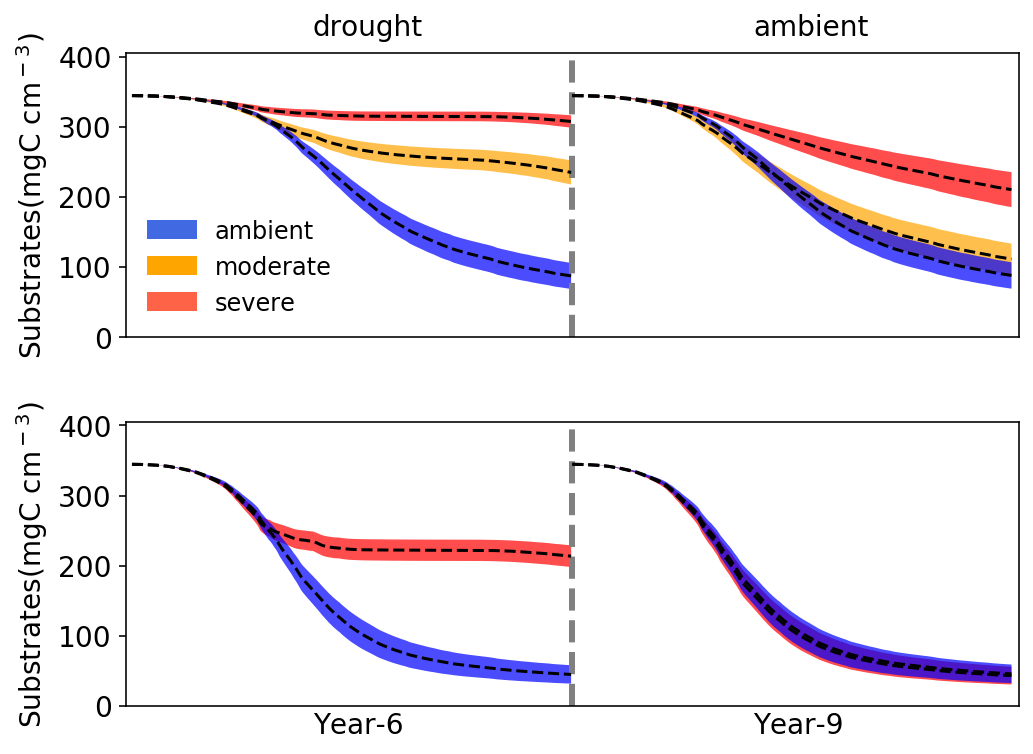

In [26]:
fig,(ax1,ax2) = plt.subplots(2,1,figsize=(8,6))

alpha = 0.7

ax1.axvline(x=365*2, color='grey',linestyle='--',lw=3)
ax1.set_xlim(365*1-5,365*3+5)
ax1.set_ylim(0,400+5)
ax1.tick_params(bottom=False,labelbottom=False,labelsize=14)    
ax1.set_ylabel("Substrates(mgC cm$^-$$^3$)",size=14,weight='normal', color='k')
ax1.text(365+150,  430,'drought',fontsize=14)
ax1.text(365*2+150,430,'ambient',fontsize=14)

ax1.plot(sub_basex10369.mean(axis=1)[365*1:365*2],color='k',linestyle='--')
ax1.fill_between(x=sub_basex10369.index[365*1:365*2],y1=boundx10369[0][365*1:365*2],y2=boundx10369[1][365*1:365*2], facecolor='red',alpha=alpha)
ax1.plot(sub_basex10369.mean(axis=1)[365*2:365*3],color='k',linestyle='--')
ax1.fill_between(x=sub_basex10369.index[365*2:365*3],y1=boundx10369[0][365*2:365*3],y2=boundx10369[1][365*2:365*3], facecolor='red',alpha=alpha)

ax1.plot(sub_basex4369.mean(axis=1)[365*1:365*2],color='k',linestyle='--')
ax1.fill_between(x=sub_basex4369.index[365*1:365*2], y1=boundx4369[0][365*1:365*2], y2=boundx4369[1][365*1:365*2], facecolor='orange', alpha=alpha)
ax1.plot(sub_basex4369.mean(axis=1)[365*2:365*3],color='k',linestyle='--')
ax1.fill_between(x=sub_basex4369.index[365*2:365*3], y1=boundx4369[0][365*2:365*3], y2=boundx4369[1][365*2:365*3], facecolor='orange', alpha=alpha)

ax1.plot(sub_base369.mean(axis=1)[365*1:365*2],color='k',linestyle='--')
ax1.fill_between(x=sub_base369.index[365*1:365*2], y1=bound369[0][365*1:365*2], y2=bound369[1][365*1:365*2], facecolor='blue', alpha=alpha) 
ax1.plot(sub_base369.mean(axis=1)[365*2:365*3],color='k',linestyle='--')
ax1.fill_between(x=sub_base369.index[365*2:365*3], y1=bound369[0][365*2:365*3], y2=bound369[1][365*2:365*3], facecolor='blue', alpha=alpha) 



ax2.axvline(x=365*2, color='grey',linestyle='--',lw=3)
ax2.set_xlim(365*1-5,365*3+5)
ax2.set_ylim(0,400+5)
ax2.tick_params(bottom=False,labelbottom=False,labelsize=14)    
ax2.set_ylabel("Substrates(mgC cm$^-$$^3$)",size=14,weight='normal', color='k')
ax2.text(365+150,  -40,'Year-6',fontsize=14)
ax2.text(365*2+150,-40,'Year-9',fontsize=14)

ax2.plot(sub_basex10_dis369.mean(axis=1)[365*1:365*2],color='k',linestyle='--')
ax2.fill_between(x=sub_basex10_dis369.index[365*1:365*2],y1=boundx10dis369[0][365*1:365*2],y2=boundx10dis369[1][365*1:365*2], facecolor='red',alpha=alpha)
ax2.plot(sub_basex10_dis369.mean(axis=1)[365*2:365*3],color='k',linestyle='--')
ax2.fill_between(x=sub_basex10_dis369.index[365*2:365*3],y1=boundx10dis369[0][365*2:365*3],y2=boundx10dis369[1][365*2:365*3], facecolor='red',alpha=alpha)

ax2.plot(sub_base_dis369.mean(axis=1)[365*1:365*2],color='k',linestyle='--')
ax2.fill_between(x=sub_base_dis369.index[365*1:365*2], y1=bounddis369[0][365*1:365*2], y2=bounddis369[1][365*1:365*2], facecolor='blue', alpha=alpha) 
ax2.plot(sub_base_dis369.mean(axis=1)[365*2:365*3],color='k',linestyle='--')
ax2.fill_between(x=sub_base_dis369.index[365*2:365*3], y1=bounddis369[0][365*2:365*3], y2=bounddis369[1][365*2:365*3], facecolor='blue', alpha=alpha) 

#legend
blue_patch= mpatches.Patch(color='royalblue',label='ambient')
orange_patch= mpatches.Patch(color='orange',label='moderate')
red_patch = mpatches.Patch(color='tomato', label='severe')
ax1.legend(handles=[blue_patch,orange_patch,red_patch],fontsize=12,frameon=False)

plt.subplots_adjust(hspace=0.3)

#plt.savefig('../figures/substrate.pdf',bbox_inches='tight')

plt.show()

## `drought+dispersal(6+7-9)`

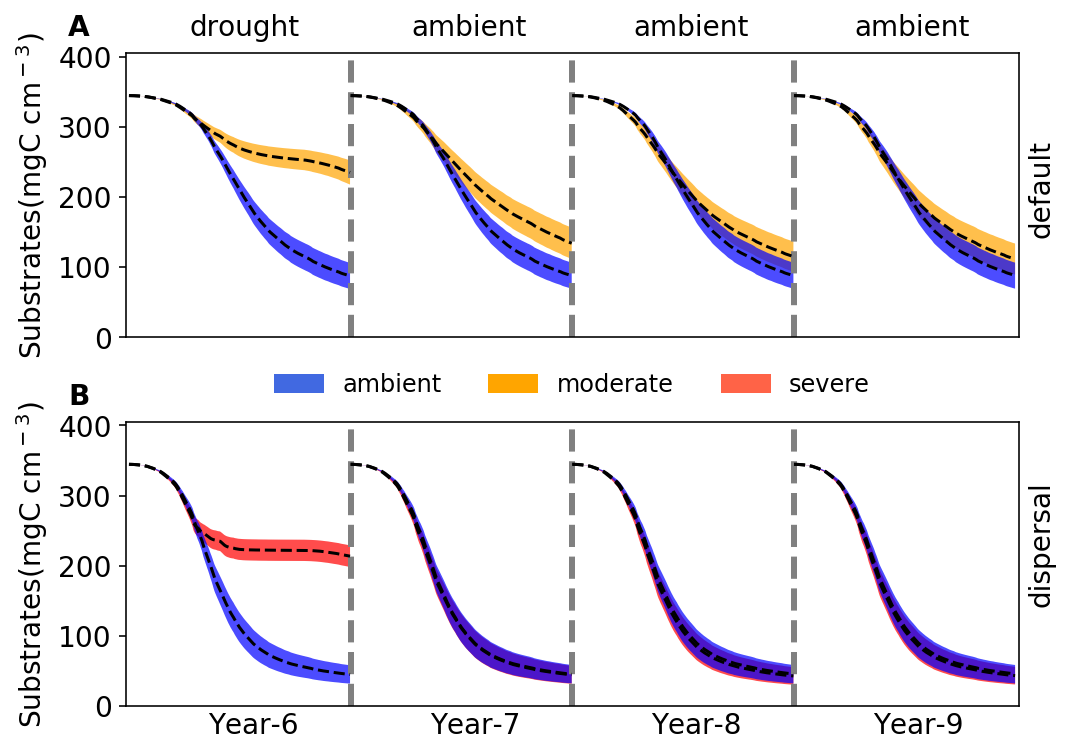

In [24]:
fig,(ax1,ax2) = plt.subplots(2,1,figsize=(8,6))

alpha = 0.7

ax1.axvline(x=365*2, color='grey',linestyle='--',lw=3)
ax1.axvline(x=365*3, color='grey',linestyle='--',lw=3)
ax1.axvline(x=365*4, color='grey',linestyle='--',lw=3)

ax1.set_xlim(365*1-5,365*5+5)
ax1.set_ylim(0,400+5)
ax1.tick_params(bottom=False,labelbottom=False,labelsize=14)    
ax1.set_ylabel("Substrates(mgC cm$^-$$^3$)",size=14,weight='normal', color='k')
ax1.text(365*1+100,430,'drought',fontsize=14)
ax1.text(365*2+100,430,'ambient',fontsize=14)
ax1.text(365*3+100,430,'ambient',fontsize=14)
ax1.text(365*4+100,430,'ambient',fontsize=14)

ax1.text(365*5+20,200-50,'default',fontsize=14,rotation=90)
ax1.text(365*1-100,430,'A',fontsize=14, weight='heavy')

#ax1.annotate("ambient", xy=(365*2+150, 430), xytext=(0.05, 0.05), arrowprops=dict(arrowstyle="->"))

#year6
#ax1.plot(sub_basex1036789.mean(axis=1)[365*1:365*2],color='k',linestyle='--')
#ax1.fill_between(x=sub_basex1036789.index[365*1:365*2],y1=boundx1036789[0][365*1:365*2],y2=boundx1036789[1][365*1:365*2], facecolor='red',alpha=alpha)
#year7
#ax1.plot(sub_basex1036789.mean(axis=1)[365*2:365*3],color='k',linestyle='--')
#ax1.fill_between(x=sub_basex1036789.index[365*2:365*3],y1=boundx1036789[0][365*2:365*3],y2=boundx1036789[1][365*2:365*3], facecolor='red',alpha=alpha)
#year8
#ax1.plot(sub_basex1036789.mean(axis=1)[365*3:365*4],color='k',linestyle='--')
#ax1.fill_between(x=sub_basex1036789.index[365*3:365*4],y1=boundx1036789[0][365*3:365*4],y2=boundx1036789[1][365*3:365*4], facecolor='red',alpha=alpha)
#year9
#ax1.plot(sub_basex1036789.mean(axis=1)[365*4:365*5],color='k',linestyle='--')
#ax1.fill_between(x=sub_basex1036789.index[365*4:365*5],y1=boundx1036789[0][365*4:365*5],y2=boundx1036789[1][365*4:365*5], facecolor='red',alpha=alpha)

## scenario basex4
#year-6
ax1.plot(sub_basex436789.mean(axis=1)[365*1:365*2],color='k',linestyle='--')
ax1.fill_between(x=sub_basex436789.index[365*1:365*2], y1=boundx436789[0][365*1:365*2], y2=boundx436789[1][365*1:365*2], facecolor='orange', alpha=alpha)
#year-7
ax1.plot(sub_basex436789.mean(axis=1)[365*2:365*3],color='k',linestyle='--')
ax1.fill_between(x=sub_basex436789.index[365*2:365*3], y1=boundx436789[0][365*2:365*3], y2=boundx436789[1][365*2:365*3], facecolor='orange', alpha=alpha)
#year-8
ax1.plot(sub_basex436789.mean(axis=1)[365*3:365*4],color='k',linestyle='--')
ax1.fill_between(x=sub_basex436789.index[365*3:365*4], y1=boundx436789[0][365*3:365*4], y2=boundx436789[1][365*3:365*4], facecolor='orange', alpha=alpha)
#year-9
ax1.plot(sub_basex436789.mean(axis=1)[365*4:365*5],color='k',linestyle='--')
ax1.fill_between(x=sub_basex436789.index[365*4:365*5], y1=boundx436789[0][365*4:365*5], y2=boundx436789[1][365*4:365*5], facecolor='orange', alpha=alpha)

#year-6
ax1.plot(sub_base36789.mean(axis=1)[365*1:365*2],color='k',linestyle='--')
ax1.fill_between(x=sub_base36789.index[365*1:365*2], y1=bound36789[0][365*1:365*2], y2=bound36789[1][365*1:365*2], facecolor='blue', alpha=alpha) 
#year-7
ax1.plot(sub_base36789.mean(axis=1)[365*2:365*3],color='k',linestyle='--')
ax1.fill_between(x=sub_base36789.index[365*2:365*3], y1=bound36789[0][365*2:365*3], y2=bound36789[1][365*2:365*3], facecolor='blue', alpha=alpha) 
#year-8
ax1.plot(sub_base36789.mean(axis=1)[365*3:365*4],color='k',linestyle='--')
ax1.fill_between(x=sub_base36789.index[365*3:365*4], y1=bound36789[0][365*2:365*3], y2=bound36789[1][365*2:365*3], facecolor='blue', alpha=alpha) 
#year-9
ax1.plot(sub_base36789.mean(axis=1)[365*4:365*5],color='k',linestyle='--')
ax1.fill_between(x=sub_base36789.index[365*4:365*5], y1=bound36789[0][365*2:365*3], y2=bound36789[1][365*2:365*3], facecolor='blue', alpha=alpha) 




ax2.axvline(x=365*2, color='grey',linestyle='--',lw=3)
ax2.axvline(x=365*3, color='grey',linestyle='--',lw=3)
ax2.axvline(x=365*4, color='grey',linestyle='--',lw=3)

ax2.set_xlim(365*1-5,365*5+5)
ax2.set_ylim(0,400+5)
ax2.tick_params(bottom=False,labelbottom=False,labelsize=14)    
ax2.set_ylabel("Substrates(mgC cm$^-$$^3$)",size=14,weight='normal', color='k')
ax2.text(365*1+130, -40,'Year-6',fontsize=14)
ax2.text(365*2+130, -40,'Year-7',fontsize=14)
ax2.text(365*3+130, -40,'Year-8',fontsize=14)
ax2.text(365*4+130, -40,'Year-9',fontsize=14)

ax2.text(365*5+20,200-50,'dispersal',fontsize=14,rotation=90)

ax2.text(365*1-100,430,'B',fontsize=14, weight='heavy')

#year6
ax2.plot(sub_basex10_dis36789.mean(axis=1)[365*1:365*2],color='k',linestyle='--')
ax2.fill_between(x=sub_basex10_dis36789.index[365*1:365*2],y1=boundx10dis36789[0][365*1:365*2],y2=boundx10dis36789[1][365*1:365*2], facecolor='red',alpha=alpha)
#year7
ax2.plot(sub_basex10_dis36789.mean(axis=1)[365*2:365*3],color='k',linestyle='--')
ax2.fill_between(x=sub_basex1036789.index[365*2:365*3],y1=boundx10dis36789[0][365*2:365*3],y2=boundx10dis36789[1][365*2:365*3], facecolor='red',alpha=alpha)
#year8
ax2.plot(sub_basex10_dis36789.mean(axis=1)[365*3:365*4],color='k',linestyle='--')
ax2.fill_between(x=sub_basex1036789.index[365*3:365*4],y1=boundx10dis36789[0][365*3:365*4],y2=boundx10dis36789[1][365*3:365*4], facecolor='red',alpha=alpha)
#year9
ax2.plot(sub_basex10_dis36789.mean(axis=1)[365*4:365*5],color='k',linestyle='--')
ax2.fill_between(x=sub_basex1036789.index[365*4:365*5],y1=boundx10dis36789[0][365*4:365*5],y2=boundx10dis36789[1][365*4:365*5], facecolor='red',alpha=alpha)


#year-6
ax2.plot(sub_base_dis36789.mean(axis=1)[365*1:365*2],color='k',linestyle='--')
ax2.fill_between(x=sub_base_dis36789.index[365*1:365*2], y1=bounddis36789[0][365*1:365*2], y2=bounddis36789[1][365*1:365*2], facecolor='blue', alpha=alpha) 
#year-7
ax2.plot(sub_base_dis36789.mean(axis=1)[365*2:365*3],color='k',linestyle='--')
ax2.fill_between(x=sub_base_dis36789.index[365*2:365*3], y1=bounddis36789[0][365*2:365*3], y2=bounddis36789[1][365*2:365*3], facecolor='blue', alpha=alpha) 
#year-8
ax2.plot(sub_base_dis36789.mean(axis=1)[365*3:365*4],color='k',linestyle='--')
ax2.fill_between(x=sub_base_dis36789.index[365*3:365*4], y1=bounddis36789[0][365*2:365*3], y2=bounddis36789[1][365*2:365*3], facecolor='blue', alpha=alpha) 
#year-9
ax2.plot(sub_base_dis36789.mean(axis=1)[365*4:365*5],color='k',linestyle='--')
ax2.fill_between(x=sub_base36789.index[365*4:365*5], y1=bounddis36789[0][365*2:365*3], y2=bounddis36789[1][365*2:365*3], facecolor='blue', alpha=alpha) 


#legend
blue_patch= mpatches.Patch(color='royalblue',label='ambient')
orange_patch= mpatches.Patch(color='orange',label='moderate')
red_patch = mpatches.Patch(color='tomato', label='severe')
ax2.legend(handles=[blue_patch,orange_patch,red_patch],fontsize=12,frameon=False,bbox_to_anchor=(0.5, 1.25),ncol=3,loc='upper center')

plt.subplots_adjust(hspace=0.3)

#plt.savefig('../figures/substrate.pdf',bbox_inches='tight')

plt.show()

## year-6 w/o dispersal

In [28]:
sub_base36789.mean(axis=1)[365*1:365*2].describe()

count    365.000000
mean     218.769303
std       96.035135
min       87.081639
25%      121.820035
50%      210.086837
75%      325.190240
max      344.559382
dtype: float64

In [29]:
sub_basex436789.mean(axis=1)[365*1:365*2].describe()

count    365.000000
mean     284.818444
std       36.897362
min      234.845985
25%      253.783632
50%      269.581429
75%      323.564215
max      344.559347
dtype: float64

In [30]:
sub_basex1036789.mean(axis=1)[365*1:365*2].describe()

count    365.000000
mean     322.142575
std       11.240174
min      307.620055
25%      314.834741
50%      315.443413
75%      330.629214
max      344.559471
dtype: float64

In [32]:
((344.559347 - 87.081639) - (344.559347 - 234.845985)) / (344.559347 - 87.081639)

0.5738918027031684

In [33]:
((344.559347 - 87.081639) - (344.559347 - 307.620055)) / (344.559347 - 87.081639)

0.8565340188596055

## year-7 w/o dispersal

In [34]:
sub_base36789.mean(axis=1)[365*2:365*3].describe()

count    365.000000
mean     219.070694
std       95.820028
min       87.461479
25%      122.379751
50%      210.509281
75%      325.224472
max      344.559337
dtype: float64

In [35]:
sub_basex436789.mean(axis=1)[365*2:365*3].describe()

count    365.000000
mean     243.287309
std       73.604072
min      133.735145
25%      172.604332
50%      237.548164
75%      321.639278
max      344.559441
dtype: float64

In [36]:
sub_basex1036789.mean(axis=1)[365*2:365*3].describe()

count    365.000000
mean     293.120204
std       37.652956
min      230.196273
25%      258.645111
50%      293.477313
75%      331.051981
max      344.559370
dtype: float64

In [37]:
((344.559337-87.461479) - (344.559337 - 133.735145))/(344.559337-87.461479)

0.1799846422680036

In [38]:
((344.559337-87.461479) - (344.559337 - 230.196273))/(344.559337-87.461479)

0.5551769085528514

## year-9 w/o dispersal

In [39]:
sub_base36789.mean(axis=1)[365*4:365*5].describe()

count    365.000000
mean     219.094897
std       95.699015
min       87.757715
25%      122.554780
50%      210.378045
75%      325.148225
max      344.559357
dtype: float64

In [40]:
sub_basex436789.mean(axis=1)[365*4:365*5].describe()

count    365.000000
mean     227.116925
std       84.180157
min      111.131030
25%      145.072512
50%      214.929611
75%      319.204186
max      344.559379
dtype: float64

In [41]:
sub_basex1036789.mean(axis=1)[365*4:365*5].describe()

count    365.000000
mean     282.846915
std       45.039723
min      210.311352
25%      240.956468
50%      281.935097
75%      329.106091
max      344.559442
dtype: float64

In [42]:
((344.559337-87.757715) - (344.559337 - 111.131030))/(344.559337-87.757715)

0.09101700689413866

In [43]:
((344.559337-87.757715) - (344.559337 - 210.311352))/(344.559337-87.757715)

0.4772307746560883

## year-6 w/ dispersal

In [45]:
sub_base_dis36789.mean(axis=1)[365*1:365*2].describe()

count    365.000000
mean     164.673970
std      115.775003
min       44.499938
25%       58.179501
50%      111.701328
75%      295.488325
max      344.559380
dtype: float64

In [48]:
sub_basex10_dis36789.mean(axis=1)[365*1:365*2].describe()

count    365.000000
mean     253.947141
std       46.976202
min      213.391412
25%      221.745483
50%      223.076753
75%      291.003023
max      344.559300
dtype: float64

In [49]:
((344.559380- 44.499938) - (344.559300-213.391412))/(344.559380- 44.499938)

0.5628603215225602